# Importing Libraries 

In [125]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import sklearn.metrics as metrics
from io import StringIO  
import pydotplus


# Models' Creation with The First DataSet 

# Loading The Dataset 

In [126]:
dt_features = pd.read_csv('./Features_Selection_Mansfield_Project_1.csv' ,  encoding='latin-1')
dt_features.head(5)

,Date,P. Income,P. Consumption Exp,Job_Opening,Inflaction,Ind. Prod. Cement and Concrete,Ind. Prod. Total Index,GDP_Construction,All Employees. Res. Building,New Privately-Owned Housing Units Authorized in Permit,Purchase Only House Price Index,Sales_UND
0,1/1/2017,16485.8,12347.6,161,2.5,82.0004,98.7446,787.6,717.8,1301,234.16,1.018430
1,2/1/2017,16559.1,12355.4,190,2.7,87.5294,98.3676,787.6,721.3,1240,236.18,1.038805
2,3/1/2017,16611.2,12413.8,175,2.4,93.9117,99.1065,787.6,723.3,1285,239.91,2.782969
3,4/1/2017,16666.6,12416.5,207,2.2,98.8599,100.0363,792.1,735.0,1258,243.19,1.311840
4,5/1/2017,16761.8,12420.9,172,1.9,104.3002,100.1470,792.1,748.1,1209,246.05,1.925150


In [127]:
dt_features.index = pd.to_datetime(dt_features['Date'])
dt_features.drop("Date", axis = 1, inplace = True)
dt_features.head(5)

,P. Income,P. Consumption Exp,Job_Opening,Inflaction,Ind. Prod. Cement and Concrete,Ind. Prod. Total Index,GDP_Construction,All Employees. Res. Building,New Privately-Owned Housing Units Authorized in Permit,Purchase Only House Price Index,Sales_UND
Date,,,,,,,,,,,
2017-01-01,16485.8,12347.6,161,2.5,82.0004,98.7446,787.6,717.8,1301,234.16,1.018430
2017-02-01,16559.1,12355.4,190,2.7,87.5294,98.3676,787.6,721.3,1240,236.18,1.038805
2017-03-01,16611.2,12413.8,175,2.4,93.9117,99.1065,787.6,723.3,1285,239.91,2.782969
2017-04-01,16666.6,12416.5,207,2.2,98.8599,100.0363,792.1,735.0,1258,243.19,1.311840
2017-05-01,16761.8,12420.9,172,1.9,104.3002,100.1470,792.1,748.1,1209,246.05,1.925150


# Dropping 'Sales UND' from the original data

In [128]:
dt_variables = dt_features.drop(['Sales_UND'], axis=1)
dt_variables.head(5)

,P. Income,P. Consumption Exp,Job_Opening,Inflaction,Ind. Prod. Cement and Concrete,Ind. Prod. Total Index,GDP_Construction,All Employees. Res. Building,New Privately-Owned Housing Units Authorized in Permit,Purchase Only House Price Index
Date,,,,,,,,,,
2017-01-01,16485.8,12347.6,161,2.5,82.0004,98.7446,787.6,717.8,1301,234.16
2017-02-01,16559.1,12355.4,190,2.7,87.5294,98.3676,787.6,721.3,1240,236.18
2017-03-01,16611.2,12413.8,175,2.4,93.9117,99.1065,787.6,723.3,1285,239.91
2017-04-01,16666.6,12416.5,207,2.2,98.8599,100.0363,792.1,735.0,1258,243.19
2017-05-01,16761.8,12420.9,172,1.9,104.3002,100.1470,792.1,748.1,1209,246.05


# Data Preparation

# Data Standardization by Feature standardization

In [129]:
dt_variables.Std = (dt_variables-dt_variables.mean())/dt_variables.std()
dt_variables.Std.head(5)

C:\Users\yrive\AppData\Local\Temp/ipykernel_18980/3843959734.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dt_variables.Std = (dt_variables-dt_variables.mean())/dt_variables.std()


,P. Income,P. Consumption Exp,Job_Opening,Inflaction,Ind. Prod. Cement and Concrete,Ind. Prod. Total Index,GDP_Construction,All Employees. Res. Building,New Privately-Owned Housing Units Authorized in Permit,Purchase Only House Price Index
Date,,,,,,,,,,
2017-01-01,-1.379314,-1.117771,-1.973010,0.222404,-1.855982,-0.333616,-1.686479,-2.067389,-0.696626,-1.424396
2017-02-01,-1.331957,-1.101867,-1.457865,0.394880,-1.243054,-0.430375,-1.686479,-1.983675,-1.048480,-1.361870
2017-03-01,-1.298297,-0.982791,-1.724319,0.136166,-0.535532,-0.240733,-1.686479,-1.935838,-0.788915,-1.246414
2017-04-01,-1.262504,-0.977286,-1.155883,-0.036311,0.013011,-0.002097,-1.600016,-1.655993,-0.944654,-1.144887
2017-05-01,-1.200998,-0.968315,-1.777610,-0.295025,0.616106,0.026315,-1.600016,-1.342662,-1.227291,-1.056360


# New Variables to Create the models

In [130]:
dt_trained = dt_variables.Std[['P. Income', 'P. Consumption Exp', 'Job_Opening', 'Inflaction', 'Ind. Prod. Cement and Concrete',
                               'Ind. Prod. Total Index', 'GDP_Construction', 'All  Employees. Res. Building', 
                               'New Privately-Owned Housing Units Authorized in Permit', 'Purchase Only House Price Index']]

dt_target = dt_features[['Sales_UND']]


#  Splitting Dataset

In [131]:
x_train, x_test, y_train, y_test = train_test_split(dt_trained, dt_target, test_size = 0.3 , random_state = 0)

print("Total Data (100%):",len(dt_trained))
print("X_Testing Data (30%):" ,len(x_test))
print("Y_Testing Data (30%):" ,len(y_test))
print("X_Training Data (70%):",len(x_train))
print("Y_Training Data (70%):",len(y_train))

Total Data (100%): 57
X_Testing Data (30%): 18
Y_Testing Data (30%): 18
X_Training Data (70%): 39
Y_Training Data (70%): 39


# 1. Lasso Regression Model

In [132]:
modelLasso = Lasso(alpha=0.1).fit(x_train, y_train)
y_predict_lasso = modelLasso.predict(x_test)


# Lasso Model Evaluation

In [133]:
# Model Evaluation
mae = metrics.mean_absolute_error(y_test, y_predict_lasso)
mse = metrics.mean_squared_error(y_test, y_predict_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_predict_lasso)

print("Model Evaluation")
print(30*(''))
print("MAE(Mean absolute error):",mae.round(2))
print("MSE(Mean Squared Error):", mse.round(2))
print("RMSE(Root Mean Squared Error) :", rmse.round(2))
print("R-Squared(Coefficient of determination):", r2.round(2))
print(30*(''))
print("Coef. LASSO")
print(modelLasso.coef_.round(2))

Model Evaluation

MAE(Mean absolute error): 0.71
MSE(Mean Squared Error): 0.77
RMSE(Root Mean Squared Error) : 0.88
R-Squared(Coefficient of determination): 0.42

Coef. LASSO
[-0.19  0.   -0.1   0.   -0.    0.   -0.24 -0.    0.   -0.  ]


# Model Plot

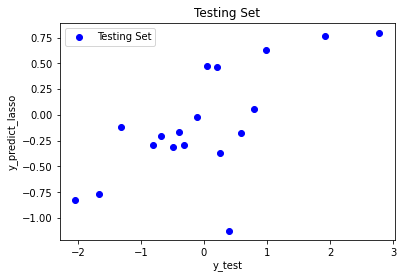

In [159]:
plt.scatter(y_test, y_predict_lasso, color="blue", label="Testing Set")
plt.title ('Testing Set')
plt.ylabel('y_predict_lasso')
plt.xlabel('y_test')
plt.legend()
plt.show()

In [145]:
y_predict_lasso_train = modelLasso.predict(x_train)

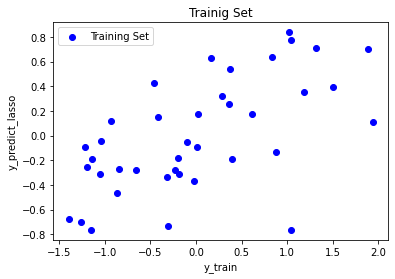

In [160]:
plt.scatter(y_train, y_predict_lasso_train, color="blue", label="Training Set")
plt.title ('Trainig Set')
plt.ylabel('y_predict_lasso')
plt.xlabel('y_train')
plt.legend()
plt.show()

In [134]:
# Lasso Conclusion 

# From the evaluation of the lasso Coefficient, it could be eliminated the following features:

# P. Consumption Exp
# Inflation
# Ind. Prod. Cement and Concrete
# Ind. Prod. Total Index
# All  Employees. Res. Building
# New Privately-Owned Housing Units Authorized in Permit
# Purchase Only House Price Index

# The following features should be evaluated for further advances:

# P. Income
# Job_Opening
# GDP_Construction

# 2. Decision Tree Regression 

In [135]:
Tree_model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_tree = Tree_model.predict(x_test)
y_pred_tree 

array([-0.55896624, -0.55896624, -0.04552369, -0.55896624,  0.53993926,
        1.31234963, -0.55896624, -1.20609193, -0.55896624, -1.20609193,
        1.31234963,  0.53993926, -0.55896624, -0.55896624, -0.55896624,
       -0.04552369, -0.55896624,  0.53993926])

# Tree Model Evaluation

In [136]:
# Model Evaluation
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_pred_tree)

print("Model Evaluation")
print(30*(''))
print("MAE(Mean absolute error):",mae.round(2))
print("MSE(Mean Squared Error):", mse.round(2))
print("RMSE(Root Mean Squared Error) :", rmse.round(2))
print("R-Squared(Coefficient of determination):", r2.round(2))

Model Evaluation

MAE(Mean absolute error): 0.62
MSE(Mean Squared Error): 0.59
RMSE(Root Mean Squared Error) : 0.77
R-Squared(Coefficient of determination): 0.56


# Model Graph

In [137]:
dot_data = StringIO()
export_graphviz(Tree_model, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = dt_trained.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FeatureSelectionTree_1.png')


True

In [138]:
# Decision Tree Conclusion 

# From the decision tree model evaluation, it could be concluded that 
# the following features are the best to predict the Mansfield sales in the future: 

# Inflaction
# P. Income

# Conclusion

In [ ]:
# From the evaluation of these model, the best variables that fit to the prediction sale are:

# P. Income
# Job_Opening
# GDP_Construction
# Inflaction